In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import json
from datetime import datetime

In [2]:
US = pd.read_csv("youtube/USvideos.csv")
GB = pd.read_csv("youtube/GBvideos.csv")
CA = pd.read_csv("youtube/CAvideos.csv")
US["region"] = "US"
GB["region"] = "GB"
CA["region"] = "CA"
df = pd.concat([US, GB, CA])
df = US # just using US data for now

In [3]:
# convert publish date and trending date to datetime 
# seperate publish date into date and time
df.head()
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df.insert(4, 'publish_date',df['publish_time'].dt.date)
df['publish_time'] = df['publish_time'].dt.time
df.drop(["thumbnail_link","description", "comments_disabled", "ratings_disabled", "video_error_or_removed"],axis=1)

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,region
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,2966,15954,US
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,US
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,US
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13,24,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,US
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,2018-05-18,15,13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,US
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,2018-05-18,22,01:00:06,[none],1064798,60008,382,3936,US
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,2018-05-18,24,17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,US
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,2018-05-17,1,17:00:04,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,US


In [4]:
# create dictionary of categories and category ids
id_to_category = {}

with open('youtube/US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']

with open('youtube/CA_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']
        
with open('youtube/GB_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']

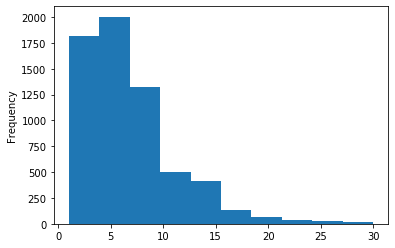

In [8]:
# keep last appearance of trending video
frequencies = df.video_id.value_counts()
frequencies.plot.hist()
trending_start = df.drop_duplicates("video_id", keep="first").set_index("video_id").rename(columns={"views":"starting_views", "likes":"starting_likes"})
trending_end = df.drop_duplicates("video_id", keep="last").set_index("video_id")
trending = pd.concat([trending_end, trending_start[["starting_views","starting_likes"]] ,frequencies], axis=1, sort=False).rename(columns={"video_id":"days_trending"})


In [36]:
trending.head()

,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,region,starting_views,starting_likes,days_trending,views_per_day,engagement,question
9wRQljFNDW8,2017-11-14 00:00:00,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,2017-11-13,17,02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,...,False,False,New England Patriots returner Dion Lewis blast...,US,81377,655,1,0.0,0.002175,False
Om_zGhJLZ5U,2017-11-14 00:00:00,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,2017-11-12,1,18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,...,False,False,With Justice League approaching fast we rewatc...,US,288922,7515,1,0.0,0.007306,False
goP4Z5wyOlM,2017-11-14 00:00:00,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,2017-11-12,25,21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,...,False,False,A strong 7.2-magnitude earthquake has rattled ...,US,34785,308,1,0.0,0.011873,False
8NHA23f7LvU,2017-11-14 00:00:00,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,2017-11-10,24,19:06:23,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,...,False,False,I think Sarah Millican was very excited for th...,US,1496225,16116,1,0.0,0.000404,False
IE-xepGLVt8,2017-11-14 00:00:00,Mayo Clinic's first face transplant patient me...,Mayo Clinic,2017-11-10,28,12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,...,False,False,One and a half years after the surgery that tr...,US,237307,1896,1,0.0,0.001096,False


In [19]:
# engagement is comments / views
trending["engagement"] = trending.comment_count/trending.views
trending["views_per_day"] = (trending.views-trending.starting_views)/trending.days_trending
trending[trending.views_per_day < 0] = 0 
trending.corr().days_trending

category_id      -0.085441
views             0.260074
likes             0.217892
dislikes          0.063631
comment_count     0.118065
starting_views    0.181504
starting_likes    0.169822
days_trending     1.000000
views_per_day     0.143846
engagement       -0.038215
Name: days_trending, dtype: float64

In [30]:
trending.corr().views_per_day

category_id      -0.154215
views             0.871961
likes             0.750614
dislikes          0.500341
comment_count     0.541382
starting_views    0.601865
starting_likes    0.562058
days_trending     0.143846
views_per_day     1.000000
engagement       -0.049757
Name: views_per_day, dtype: float64

In [45]:
trending["question"] = trending.title.str.contains("?", regex=False)
question_views = trending.groupby("question").mean()
question_views

,category_id,views,likes,dislikes,comment_count,starting_views,starting_likes,days_trending,views_per_day,engagement
question,,,,,,,,,,
False,20.241109,2.000137e+06,56775.963767,3138.393054,6453.297712,760338.280681,35012.664385,6.429454,140083.425687,0.003946
True,23.638655,1.351217e+06,36194.563025,1914.114846,6496.221289,732451.490196,26252.521008,6.789916,74194.765558,0.005837


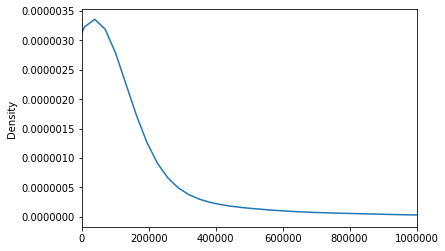

In [29]:
multidaytrending = trending[trending.days_trending > 1]
multidaytrending.views_per_day.describe()
multidaytrending.views_per_day.plot.kde(xlim =[0,1000000])